### Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizing the images to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0
print(f"Original shape: {X_train.shape}")



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Original shape: (60000, 28, 28)


Building the Architecture (The "Stack")
Input Layer (Flatten): Converts the 2D image ($28 \times 28$) into a 1D line ($784$ numbers).
Hidden Layer (Dense): The "brain" that learns patterns.Using 128 neurons.
Output Layer (Dense): The decision maker. It has 10 neurons (one for each digit 0-9)

In [4]:
model = tf.keras.Sequential([
    # Layer 1: Flatten the 28x28 images to a 1D vector of 784 pixels
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # Layer 2: Dense (Fully Connected) layer with 128 neurons
    # Activation='relu' makes the network non-linear (it decides if a neuron "fires")
    tf.keras.layers.Dense(128, activation='relu'),
    # Layer 3: Output layer with 10 neurons (one for each digit)
    # Activation='softmax' turns the output into probabilities (they sum to 1)
    tf.keras.layers.Dense(10, activation='softmax')
])

c:\Users\HUMAIDU\anaconda3\envs\mlpython310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Compiling the model

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [6]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9245 - loss: 0.2643
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9652 - loss: 0.1166
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9760 - loss: 0.0797
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9808 - loss: 0.0612
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9857 - loss: 0.0468


## Evaluation and Visualization 

313/313 - 0s - 1ms/step - accuracy: 0.9767 - loss: 0.0729

Test accuracy: 0.9767000079154968
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


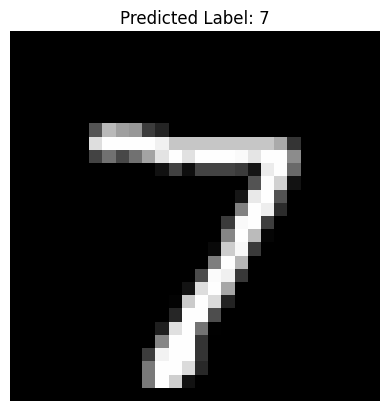

In [12]:
# Evaluation on test data 
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Make predictions on the first image on the test set
predictions = model.predict(X_test[:1]) # to pass the first image only

# To visualize 
plt.imshow(X_test[0], cmap="gray")
plt.title(f"Predicted Label: {np.argmax(predictions[0])}")
plt.axis('off')
plt.show()